# Importando bibliotecas

In [2]:
import zipfile  # extrair o zip
from io import BytesIO  # reconhecer numeros binarios e converter
from PIL import Image
import matplotlib.pyplot as plt  # plotar graficos
import os  # SO do computador
import shutil  # para manipulação de arquivos e diretorios
import pandas as pd
from sklearn.preprocessing import StandardScaler  # padronizar os dados
import tensorflow as tf
import numpy as np
import matplotlib.image as mpimg
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout


# Diretórios

In [3]:


for dirname, _, filenames in os.walk(
    "C:/Users/fllsa/Desktop/redesneurais/ReconhecimentoDeSinais/dataset_SignLanguage1/30 FPS/30 FPS/train"
):
    for filename in filenames:
        print(os.path.join(dirname, filename))


bus_dir = "C:/Users/fllsa/Desktop/redesneurais/ReconhecimentoDeSinais/dataset_SignLanguage1/30 FPS/30 FPS/train/bus_renamed"
bank_dir = "C:/Users/fllsa/Desktop/redesneurais/ReconhecimentoDeSinais/dataset_SignLanguage1/30 FPS/30 FPS/train/bank_renamed"
car_dir = "C:/Users/fllsa/Desktop/redesneurais/ReconhecimentoDeSinais/dataset_SignLanguage1/30 FPS/30 FPS/train/car_renamed"
formation_dir = "C:/Users/fllsa/Desktop/redesneurais/ReconhecimentoDeSinais/dataset_SignLanguage1/30 FPS/30 FPS/train/formation_renamed"
hospital_dir = "C:/Users/fllsa/Desktop/redesneurais/ReconhecimentoDeSinais/dataset_SignLanguage1/30 FPS/30 FPS/train/hospital_renamed"
I_dir = "C:/Users/fllsa/Desktop/redesneurais/ReconhecimentoDeSinais/dataset_SignLanguage1/30 FPS/30 FPS/train/I_renamed"
man_dir = "C:/Users/fllsa/Desktop/redesneurais/ReconhecimentoDeSinais/dataset_SignLanguage1/30 FPS/30 FPS/train/man_renamed"
motorcycle_dir = "C:/Users/fllsa/Desktop/redesneurais/ReconhecimentoDeSinais/dataset_SignLanguage1/30 FPS/30 FPS/train/motorcycle_renamed"
my_dir = "C:/Users/fllsa/Desktop/redesneurais/ReconhecimentoDeSinais/dataset_SignLanguage1/30 FPS/30 FPS/train/my_renamed"
supermarket_dir = "C:/Users/fllsa/Desktop/redesneurais/ReconhecimentoDeSinais/dataset_SignLanguage1/30 FPS/30 FPS/train/supermarket_renamed"
we_dir = "C:/Users/fllsa/Desktop/redesneurais/ReconhecimentoDeSinais/dataset_SignLanguage1/30 FPS/30 FPS/train/we_renamed"
woman_dir = "C:/Users/fllsa/Desktop/redesneurais/ReconhecimentoDeSinais/dataset_SignLanguage1/30 FPS/30 FPS/train/woman_renamed"
you_dir = "C:/Users/fllsa/Desktop/redesneurais/ReconhecimentoDeSinais/dataset_SignLanguage1/30 FPS/30 FPS/train/you_renamed"
youPlural_dir = "C:/Users/fllsa/Desktop/redesneurais/ReconhecimentoDeSinais/dataset_SignLanguage1/30 FPS/30 FPS/train/you (plural)_renamed"
your_dir = "C:/Users/fllsa/Desktop/redesneurais/ReconhecimentoDeSinais/dataset_SignLanguage1/30 FPS/30 FPS/train/your_renamed"


bus_image = os.listdir(bus_dir)
bank_image = os.listdir(bank_dir)
car_image = os.listdir(car_dir)
formation_image = os.listdir(formation_dir)
hospital_image = os.listdir(hospital_dir)
I_image = os.listdir(I_dir)
man_image = os.listdir(man_dir)
motorcycle_image = os.listdir(motorcycle_dir)
my_image =os.listdir(my_dir)
supermarket_image=os.listdir(supermarket_dir)
we_image=os.listdir(we_dir)
woman_image=os.listdir(woman_dir)
you_image=os.listdir(you_dir)
youPlural_image=os.listdir(youPlural_dir)
your_image=os.listdir(your_dir)



C:/Users/fllsa/Desktop/redesneurais/ReconhecimentoDeSinais/dataset_SignLanguage1/30 FPS/30 FPS/train\bank_renamed\bank_1605967420.jpeg
C:/Users/fllsa/Desktop/redesneurais/ReconhecimentoDeSinais/dataset_SignLanguage1/30 FPS/30 FPS/train\bank_renamed\bank_1605967420_1.jpeg
C:/Users/fllsa/Desktop/redesneurais/ReconhecimentoDeSinais/dataset_SignLanguage1/30 FPS/30 FPS/train\bank_renamed\bank_1605967420_10.jpeg
C:/Users/fllsa/Desktop/redesneurais/ReconhecimentoDeSinais/dataset_SignLanguage1/30 FPS/30 FPS/train\bank_renamed\bank_1605967420_100.jpeg
C:/Users/fllsa/Desktop/redesneurais/ReconhecimentoDeSinais/dataset_SignLanguage1/30 FPS/30 FPS/train\bank_renamed\bank_1605967420_101.jpeg
C:/Users/fllsa/Desktop/redesneurais/ReconhecimentoDeSinais/dataset_SignLanguage1/30 FPS/30 FPS/train\bank_renamed\bank_1605967420_102.jpeg
C:/Users/fllsa/Desktop/redesneurais/ReconhecimentoDeSinais/dataset_SignLanguage1/30 FPS/30 FPS/train\bank_renamed\bank_1605967420_103.jpeg
C:/Users/fllsa/Desktop/redesneurai

# Total de imagens em cada diretório

In [4]:
len(bus_image),len(bank_image),len(car_image),len(formation_image), len(hospital_image), len(I_image), len(man_image), len(motorcycle_image),len(my_image), len(supermarket_image), len(we_image), len(woman_image), len(you_image), len(youPlural_image), len(your_image)


(268, 220, 252, 4320, 219, 150, 178, 259, 187, 267, 288, 166, 203, 241, 168)

# Making train val split 

In [5]:

# Making train val split (bank SIGN)
train_bank_image = bank_image[: int(0.8 * len(bank_image))]
val_bank_image = bank_image[int(0.8 * len(bank_image)) :]


# Making train val split (BUS SIGN)
train_bus_image = bus_image[: int(0.8 * len(bus_image))]
val_bus_image = bus_image[int(0.8 * len(bus_image)) :]

# Making train val split (car SIGN)
train_car_image = car_image[: int(0.8 * len(car_image))]
val_car_image = car_image[int(0.8 * len(car_image)) :]

# Making train val split (car SIGN)
train_formation_image = formation_image[: int(0.8 * len(formation_image))]
val_formation_image = formation_image[int(0.8 * len(formation_image)) :]

# Making train val split (hospital SIGN)
train_hospital_image = hospital_image[: int(0.8 * len(hospital_image))]
val_hospital_image = hospital_image[int(0.8 * len(hospital_image)) :]

# Making train val split (I SIGN)
train_I_image = I_image[: int(0.8 * len(I_image))]
val_I_image = I_image[int(0.8 * len(I_image)) :]

# Making train val split (man SIGN)
train_man_image = man_image[: int(0.8 * len(man_image))]
val_man_image = man_image[int(0.8 * len(man_image)) :]

# Making train val split (motorcycle SIGN)
train_motorcycle_image = motorcycle_image[: int(0.8 * len(motorcycle_image))]
val_motorcycle_image = motorcycle_image[int(0.8 * len(motorcycle_image)) :]

# Making train val split (my SIGN)
train_my_image = my_image[: int(0.8 * len(my_image))]
val_my_image = my_image[int(0.8 * len(my_image)) :]

# Making train val split (supermarket SIGN)
train_supermarket_image = supermarket_image[: int(0.8 * len(supermarket_image))]
val_supermarket_image = supermarket_image[int(0.8 * len(supermarket_image)) :]


# Making train val split (we SIGN)
train_we_image = we_image[: int(0.8 * len(we_image))]
val_we_image = we_image[int(0.8 * len(we_image)) :]


# Making train val split (woman SIGN)
train_woman_image = woman_image[: int(0.8 * len(woman_image))]
val_woman_image = woman_image[int(0.8 * len(woman_image)) :]

# Making train val split (you SIGN)
train_you_image = you_image[: int(0.8 * len(you_image))]
val_you_image = you_image[int(0.8 * len(you_image)) :]

# Making train val split (youPlural SIGN)
train_youPlural_image = youPlural_image[: int(0.8 * len(youPlural_image))]
val_youPlural_image = youPlural_image[int(0.8 * len(youPlural_image)) :]


# Making train val split (your SIGN)
train_your_image = your_image[: int(0.8 * len(your_image))]
val_your_image = your_image[int(0.8 * len(your_image)) :]


train_dir = "C:/Users/fllsa/Desktop/redesneurais/ReconhecimentoDeSinais/dataset_SignLanguage1/30 FPS/30 FPS/train"
val_dir = "C:/Users/fllsa/Desktop/redesneurais/ReconhecimentoDeSinais/dataset_SignLanguage1/validation/validation"


# Create directories 

In [6]:

# Create directories (BUS)
os.makedirs(train_dir + "/bus_renamed", exist_ok=True)
os.makedirs(val_dir + "/bus_renamed", exist_ok=True)

# Create directories (bank)
os.makedirs(train_dir + "/bank_renamed", exist_ok=True)
os.makedirs(val_dir + "/bank_renamed", exist_ok=True)

# Create directories (car)
os.makedirs(train_dir + "/car_renamed", exist_ok=True)
os.makedirs(val_dir + "/car_renamed", exist_ok=True)

# Create directories (car)
os.makedirs(train_dir + "/formation_renamed", exist_ok=True)
os.makedirs(val_dir + "/formation_renamed", exist_ok=True)

# Create directories (hospital)
os.makedirs(train_dir + "/hospital_renamed", exist_ok=True)
os.makedirs(val_dir + "/hospital_renamed", exist_ok=True)

# Create directories (I)
os.makedirs(train_dir + "/I_renamed", exist_ok=True)
os.makedirs(val_dir + "/I_renamed", exist_ok=True)

# Create directories (I)
os.makedirs(train_dir + "/man_renamed", exist_ok=True)
os.makedirs(val_dir + "/man_renamed", exist_ok=True)

# Create directories (motorcycle)
os.makedirs(train_dir + "/motorcycle_renamed", exist_ok=True)
os.makedirs(val_dir + "/motorcycle_renamed", exist_ok=True)

# Create directories (my)
os.makedirs(train_dir + "/my_renamed", exist_ok=True)
os.makedirs(val_dir + "/my_renamed", exist_ok=True)

# Create directories (supermarket)
os.makedirs(train_dir + "/supermarket_renamed", exist_ok=True)
os.makedirs(val_dir + "/supermarket_renamed", exist_ok=True)

# Create directories (we)
os.makedirs(train_dir + "/we_renamed", exist_ok=True)
os.makedirs(val_dir + "/we_renamed", exist_ok=True)

# Create directories (woman)
os.makedirs(train_dir + "/woman_renamed", exist_ok=True)
os.makedirs(val_dir + "/woman_renamed", exist_ok=True)

# Create directories (you)
os.makedirs(train_dir + "/you_renamed", exist_ok=True)
os.makedirs(val_dir + "/you_renamed", exist_ok=True)

# Create directories (youPlural)
os.makedirs(train_dir + "/you (plural)_renamed", exist_ok=True)
os.makedirs(val_dir + "/you (plural)_renamed", exist_ok=True)

# Create directories (your)
os.makedirs(train_dir + "/your_renamed", exist_ok=True)
os.makedirs(val_dir + "/your_renamed", exist_ok=True)


# Copy images to train directory

In [7]:

# Copy images to train directory (bank)
for image in train_bank_image:
    src = bank_dir + "/" + image
    dst = train_dir + "/bank_renamed"
    try:
        shutil.copy2(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (bank)
for image in val_bank_image:
    src = bank_dir + "/" + image
    dst = val_dir + "/bank_renamed"
    try:
        shutil.copy2(src, dst)
    except shutil.SameFileError:
        pass

# Copy images to train directory (bus)
for image in train_bus_image:
    src = bus_dir + "/" + image
    dst = train_dir + "/bus_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (bus)
for image in val_bus_image:
    src = bus_dir + "/" + image
    dst = val_dir + "/bus_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy images to train directory (car)
for image in train_car_image:
    src = car_dir + "/" + image
    dst = train_dir + "/car_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (car)
for image in val_car_image:
    src = car_dir + "/" + image
    dst = val_dir + "/car_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

    # Copy images to train directory (formation)
for image in train_formation_image:
    src = formation_dir + "/" + image
    dst = train_dir + "/formation_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (formation)
for image in val_formation_image:
    src = formation_dir + "/" + image
    dst = val_dir + "/formation_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

        # Copy images to train directory (hospital)
for image in train_hospital_image:
    src = hospital_dir + "/" + image
    dst = train_dir + "/hospital_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (hospital)
for image in val_hospital_image:
    src = hospital_dir + "/" + image
    dst = val_dir + "/hospital_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

        # Copy images to train directory (I)
for image in train_I_image:
    src = I_dir + "/" + image
    dst = train_dir + "/I_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (I)
for image in val_I_image:
    src = I_dir + "/" + image
    dst = val_dir + "/I_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

        # Copy images to train directory (man)
for image in train_man_image:
    src = man_dir + "/" + image
    dst = train_dir + "/man_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (man)
for image in val_man_image:
    src = man_dir + "/" + image
    dst = val_dir + "/man_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

        # Copy images to train directory (motorcycle)
for image in train_motorcycle_image:
    src = motorcycle_dir + "/" + image
    dst = train_dir + "/motorcycle_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (motorcycle)
for image in val_motorcycle_image:
    src = motorcycle_dir + "/" + image
    dst = val_dir + "/motorcycle_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass
    
            # Copy images to train directory (my)
for image in train_my_image:
    src = my_dir + "/" + image
    dst = train_dir + "/my_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (my)    
for image in val_my_image:
    src = my_dir + "/" + image
    dst = val_dir + "/my_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

    
            # Copy images to train directory (supermarket)
for image in train_supermarket_image:
    src = supermarket_dir + "/" + image
    dst = train_dir + "/supermarket_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (supermarket)    
for image in val_supermarket_image:
    src = supermarket_dir + "/" + image
    dst = val_dir + "/supermarket_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

    
            # Copy images to train directory (we)
for image in train_we_image:
    src = we_dir + "/" + image
    dst = train_dir + "/we_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (we)    
for image in val_we_image:
    src = we_dir + "/" + image
    dst = val_dir + "/we_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass
    
      
            # Copy images to train directory (woman)
for image in train_woman_image:
    src = woman_dir + "/" + image
    dst = train_dir + "/woman_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (woman)    
for image in val_woman_image:
    src = woman_dir + "/" + image
    dst = val_dir + "/woman_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass
    
     # Copy images to train directory (you)
for image in train_you_image:
    src = you_dir + "/" + image
    dst = train_dir + "/you_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (you)    
for image in val_you_image:
    src = you_dir + "/" + image
    dst = val_dir + "/you_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass


     # Copy images to train directory (youPlural)
for image in train_youPlural_image:
    src = youPlural_dir + "/" + image
    dst = train_dir + "/you (plural)_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (youPlural)    
for image in val_youPlural_image:
    src = youPlural_dir + "/" + image
    dst = val_dir + "/you (plural)_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass
    
         # Copy images to train directory (your)
for image in train_your_image:
    src = your_dir + "/" + image
    dst = train_dir + "/your_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Copy image to validation directory (your)    
for image in val_your_image:
    src = your_dir + "/" + image
    dst = val_dir + "/your_renamed"
    try:
        shutil.copy(src, dst)
    except shutil.SameFileError:
        pass

# Plot Image 

(1280, 720, 3)


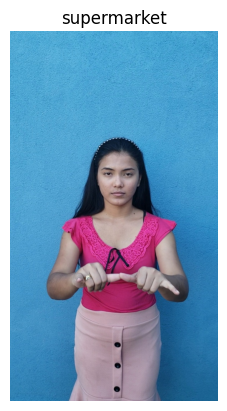

In [7]:
# Track displayed images
displayed_images = set()

def view_random_image(target_folder, title):
    global displayed_images
    random_image = random.choice(os.listdir(target_folder))

    # Ensure the selected image hasn't been displayed before
    while random_image in displayed_images:
        random_image = random.choice(os.listdir(target_folder))

    displayed_images.add(random_image)

    img = mpimg.imread(os.path.join(target_folder, random_image))
    print(img.shape)
    plt.title(title)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Call the function for at least three different categories
view_random_image(supermarket_dir, "supermarket")




In [8]:

train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/ 250.)
val_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/ 255.)

train_dataset = train_data_gen.flow_from_directory(
    train_dir, target_size=(227, 227), class_mode="categorical"
)

val_dataset = val_data_gen.flow_from_directory(
    val_dir, target_size=(227, 227), class_mode="categorical"
)


Found 7386 images belonging to 15 classes.
Found 5250 images belonging to 15 classes.


In [11]:
from tensorflow.keras.optimizers import Adam

# Criar o modelo (exemplo)
model = Sequential()
model.add(Flatten(input_shape=(227, 227, 3)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(15, activation='softmax'))  # ou o número real de classes que você tem
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 154587)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               19787264  
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 15)                975       
                                                                 
Total params: 19796495 (75.52 MB)
Trainable params: 19796495 (75.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
from tensorflow.keras.optimizers import Adam

# Definir otimizador, função de perda e métricas
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Ajuste o número de épocas e outros hiperparâmetros conforme necessário
history = model.fit(train_dataset, epochs=4, validation_data=val_dataset)


Epoch 1/4


231/231 [==============================] - 385s 2s/step - loss: 4.8855 - accuracy: 0.5565 - val_loss: 2.2341 - val_accuracy: 0.5124
Epoch 2/4
231/231 [==============================] - 245s 1s/step - loss: 2.0779 - accuracy: 0.5834 - val_loss: 1.9918 - val_accuracy: 0.5124
Epoch 3/4
231/231 [==============================] - 246s 1s/step - loss: 1.7855 - accuracy: 0.5849 - val_loss: 1.9791 - val_accuracy: 0.5124
Epoch 4/4
231/231 [==============================] - 286s 1s/step - loss: 1.7690 - accuracy: 0.5849 - val_loss: 1.9837 - val_accuracy: 0.5124


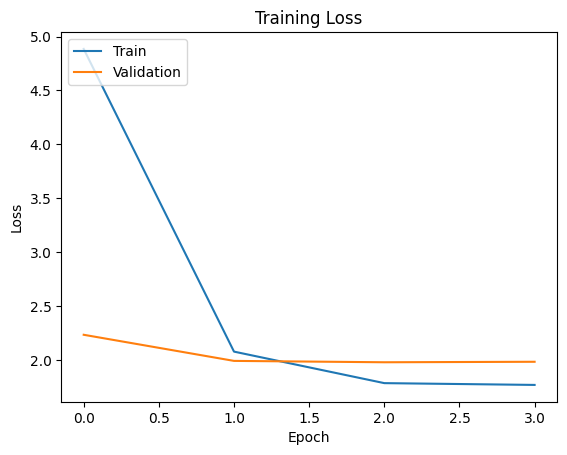

In [14]:
# Visualizar a perda durante o treinamento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


165/165 [==============================] - 85s 492ms/step


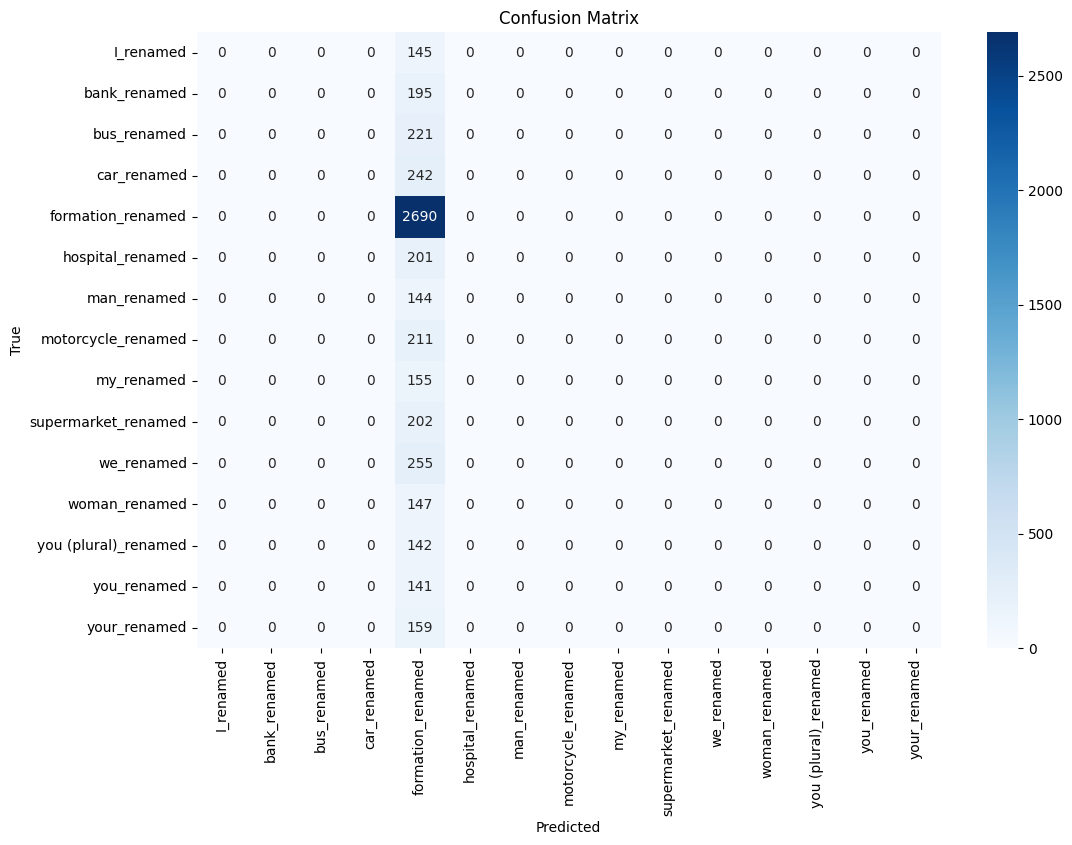

                      precision    recall  f1-score   support

           I_renamed       0.00      0.00      0.00       145
        bank_renamed       0.00      0.00      0.00       195
         bus_renamed       0.00      0.00      0.00       221
         car_renamed       0.00      0.00      0.00       242
   formation_renamed       0.51      1.00      0.68      2690
    hospital_renamed       0.00      0.00      0.00       201
         man_renamed       0.00      0.00      0.00       144
  motorcycle_renamed       0.00      0.00      0.00       211
          my_renamed       0.00      0.00      0.00       155
 supermarket_renamed       0.00      0.00      0.00       202
          we_renamed       0.00      0.00      0.00       255
       woman_renamed       0.00      0.00      0.00       147
you (plural)_renamed       0.00      0.00      0.00       142
         you_renamed       0.00      0.00      0.00       141
        your_renamed       0.00      0.00      0.00       159

      

c:\Users\fllsa\Desktop\redesneurais\ReconhecimentoDeSinais\projeto\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\fllsa\Desktop\redesneurais\ReconhecimentoDeSinais\projeto\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\fllsa\Desktop\redesneurais\ReconhecimentoDeSinais\projeto\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

In [17]:
# Realizar a previsão para o conjunto de teste
previsoes = model.predict(val_dataset)

# Converter as previsões em classes (índice do valor máximo)
previsoes_classes = np.argmax(previsoes, axis=1)

# Obter as classes verdadeiras do conjunto de validação
true_classes = val_dataset.classes

# Calcular e exibir a matriz de confusão
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

conf_mat = confusion_matrix(true_classes, previsoes_classes)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.class_indices.keys(), yticklabels=train_dataset.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Exibir o relatório de classificação
print(classification_report(true_classes, previsoes_classes, target_names=train_dataset.class_indices.keys()))


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Calcular e exibir métricas específicas
acuracia = accuracy_score(true_classes, previsoes_classes)
precisao = precision_score(true_classes, previsoes_classes, average='macro')
sensibilidade = recall_score(true_classes, previsoes_classes, average='macro')
f1 = f1_score(true_classes, previsoes_classes, average='macro')

print("Acurácia:", acuracia)
print("Precisão (Macro):", precisao)
print("Sensibilidade (Recall Macro):", sensibilidade)
print("F1 Score (Macro):", f1)

Acurácia: 0.5123809523809524
Precisão (Macro): 0.03415873015873016
Sensibilidade (Recall Macro): 0.06666666666666667
F1 Score (Macro): 0.04517212426532326


c:\Users\fllsa\Desktop\redesneurais\ReconhecimentoDeSinais\projeto\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


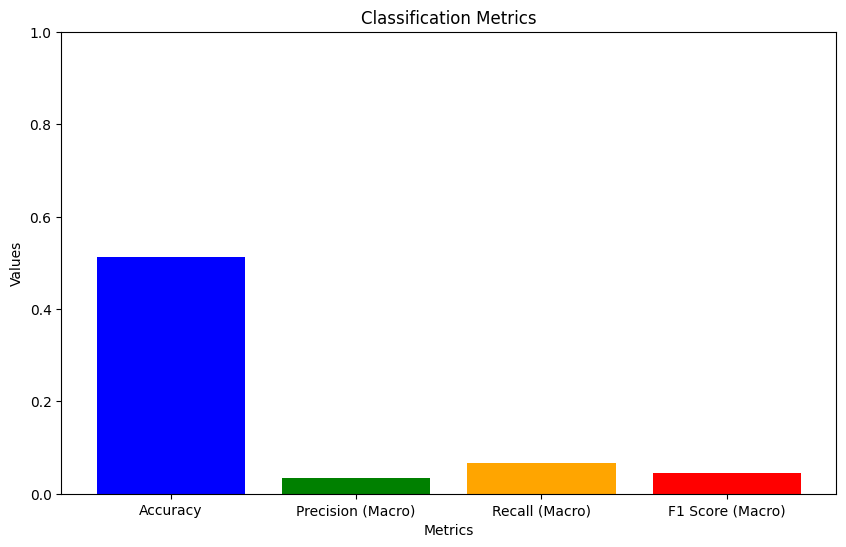

In [19]:
import matplotlib.pyplot as plt

# Valores das métricas
metric_values = [acuracia, precisao, sensibilidade, f1]
metric_names = ['Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1 Score (Macro)']

# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(metric_names, metric_values, color=['blue', 'green', 'orange', 'red'])
plt.ylim([0, 1])  # Definir o intervalo do eixo y de 0 a 1 (pois são métricas de porcentagem)
plt.title('Classification Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()
